Here we look at the ERTs created for the venues, referees and advisors.

In [1]:
import json
from matplotlib import pyplot as plt
import matplotlib
from collections import Counter
import numpy as np
import re

In [2]:
font = {'weight': 'normal', 'size': 20}
matplotlib.rc('font', **font)

In [3]:
venues = json.load(open('../data/json/dim/all/ert/venue_erts.json'))
advisors = json.load(open('../data/json/dim/all/ert/advisor_erts.json'))
referees = json.load(open('../data/json/dim/all/ert/referee_erts.json'))

In [4]:
len(venues), len(advisors), len(referees)

(4253, 1093, 10197)

In [5]:
# Remove nomen nescio contributors (present in refubium)
for contributors in (advisors, referees):
  delete = []
  for contributor in contributors:
    if re.match('N\.[\s]?N[\.]?', contributor) is not None:
      delete.append(contributor)
  for contributor in delete:
    del contributors[contributor]
len(venues), len(advisors), len(referees)

(4253, 1093, 10193)

In [7]:
venues_cnt = Counter([len(v['ids']) for v in venues.values()])
advisors_cnt = Counter([len(v['ids']) for v in advisors.values()])
referees_cnt = Counter([len(v['ids']) for v in referees.values()])

In [8]:
venue_y = [tup[1] for tup in sorted(venues_cnt.items(), key=lambda item: item[0])]
advisor_y = [tup[1] for tup in sorted(advisors_cnt.items(), key=lambda item: item[0])]
referee_y = [tup[1] for tup in sorted(referees_cnt.items(), key=lambda item: item[0])]

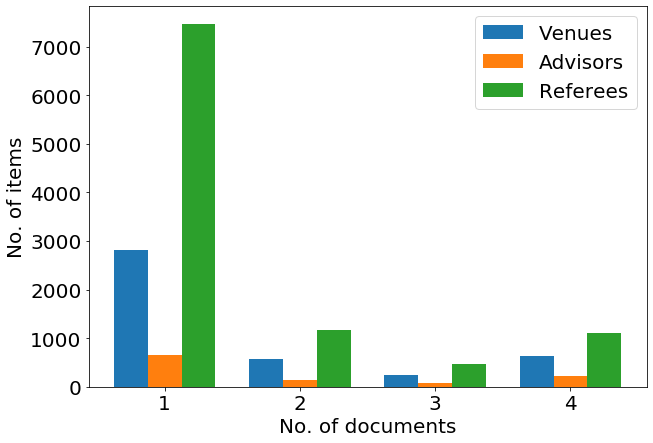

In [9]:
x = np.array([1, 2, 3, 4])
width = .25
plt.figure(figsize=(10,7))
plt.bar(x-width, venue_y, width, label='Venues')
plt.bar(x, advisor_y, width, label='Advisors')
plt.bar(x+width, referee_y, width, label='Referees')
plt.ylabel('No. of items')
plt.xlabel('No. of documents')
plt.xticks(x, [1,2,3,4])
plt.legend()
plt.show()

In [10]:
for cnt in (venues_cnt, advisors_cnt, referees_cnt):
  for n_docs, val in cnt.items():
    print(f'{n_docs} -> {round(val/sum(cnt.values()), 2)}')
  print()

4 -> 0.15
1 -> 0.66
2 -> 0.14
3 -> 0.06

4 -> 0.2
3 -> 0.07
1 -> 0.59
2 -> 0.13

4 -> 0.11
1 -> 0.73
2 -> 0.11
3 -> 0.05



In [11]:
for item in (venues, advisors, referees):
  lengths = [len(v['ert']) for v in item.values()]
  print(sum(lengths)/len(lengths))

2238.8652715730072
5666.239707227814
2769.4202884332385


Why are the ERTs of advisors so much longer than those of venues and referees?

In [12]:
for item in (venues, advisors, referees):
  sorted_lens = sorted([len(v['ert']) for v in item.values()], reverse=True)
  print(sorted_lens[:7])
  print(sorted_lens[-5:])
  print()

[12514, 12279, 11490, 11455, 11155, 11152, 11069]
[18, 16, 16, 14, 12]

[22117, 21070, 21060, 20968, 20630, 20308, 19029]
[143, 79, 72, 67, 62]

[42714, 34007, 29188, 26953, 24530, 24224, 23916]
[0, 0, 0, 0, 0]



What is the average representation length of theses and publications per repository?

In [13]:
def belongs_to(id, data):
  for key, val in data.items():
    if id in val['ids']:
      return key
  return None

In [15]:
for repo in ('depositonce', 'edoc', 'refubium'):
  types = json.load(open(f'../data/json/dim/{repo}/relevant_types.json'))
  theses, pubs = [], []
  for id, doc_type in types.items():
    if 'thesis' in doc_type:
      for experts in (advisors, referees):
        key = belongs_to(id, experts)
        if key is not None:
          theses.append(len(experts[key]['ert']))
    else:
      key = belongs_to(id, venues)
      if key is not None:
        pubs.append(len(venues[key]['ert']))
  print(repo)
  if len(theses) > 0:
    print(f'Theses: {sum(theses)/len(theses)}')
  if len(pubs) > 0:
    print(f'Publications: {sum(pubs)/len(pubs)}')

depositonce
Theses: 8586.833427124368
Publications: 2977.5361233480176
edoc
Theses: 5428.054479418886
Publications: 2417.91968503937
refubium
Theses: 3064.93797856049
Publications: 3652.0407103825137
